In [16]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../State_Data.csv")
df = df.drop(columns=["% Buddhist", "% Jewish", "% Hindu", "% Muslim"])
df.head()

,state,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
0,Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,30.5
1,Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,14.2
2,Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,5.5
3,Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,30.7
4,California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,-20.5


In [5]:
kamala_won = df[df["Election Result"] < 0]
trump_won = df[df["Election Result"] > 0]

kamala_won["Election Result"].median(), trump_won["Election Result"].median()

(-13.7, 19.200000000000003)

In [6]:
df.head()

,state,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
0,Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,30.5
1,Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,14.2
2,Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,5.5
3,Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,30.7
4,California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,-20.5


In [7]:
def get_bin(a: float):
    if a < 0:
        # Kamala won
        return 0
    else:
        # Trump won
        return 1
    
df["Election Result"] = df["Election Result"].apply(get_bin)
df.head()

,state,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
0,Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,1
1,Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,1
2,Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,1
3,Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,1
4,California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,0


In [8]:
df.set_index("state", inplace=True)
df.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
state,,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,1
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,1
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,1
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,0


In [9]:
df.head(30)

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
state,,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5,1
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1,1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2,1
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7,1
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2,0
Colorado,5877610,70.4,3.9,5.1,22.7,6.9,86.0,63.0,42.829355,37.9,0
Connecticut,3617176,64.5,10.9,5.9,18.6,15.9,86.3,71.0,40.202145,41.3,0
Delaware,1031890,59.3,22.5,5.1,11.1,8.8,82.6,71.0,33.699365,41.9,0
District of Columbia,678972,38.8,40.9,6.4,12.0,9.1,100.0,65.0,61.642405,34.9,0


In [10]:
scaled_data = df.copy()
scaled_data = scaled_data.drop(columns=["Election Result"])
scaled_data.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age
state,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,88.0,26.703532,39.5
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,64.0,28.979858,36.1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,67.0,30.853004,39.2
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,81.0,24.298995,38.7
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,63.0,34.639426,38.2


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns[:10])
scaled_data.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age
0,0.117881,0.627566,0.617284,0.017889,0.077419,0.238532,0.348228,1.00000,0.109992,0.576
1,0.003891,0.552786,0.061728,0.143113,0.116129,0.573394,0.459168,0.25000,0.167977,0.304
2,0.178402,0.533724,0.108642,0.075134,0.634409,0.087156,0.835131,0.34375,0.215692,0.552
3,0.064711,0.689150,0.345679,0.019678,0.150538,0.128440,0.314330,0.78125,0.048740,0.512
4,1.000000,0.243402,0.123457,0.309481,0.823656,0.600917,0.910632,0.21875,0.312145,0.472


In [12]:
df["Election Result"]

state
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              0
Colorado                0
Connecticut             0
Delaware                0
District of Columbia    0
Florida                 1
Georgia                 1
Hawaii                  0
Idaho                   1
Illinois                0
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   0
Maryland                0
Massachusetts           0
Michigan                1
Minnesota               0
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           0
New Jersey              0
New Mexico              0
New York                0
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  0
Pennsy

In [13]:
data_counts = (scaled_data * 100).astype(int)
data_counts.set_index(df.index, inplace=True)
data_counts["Election Result"] = df["Election Result"]
data_counts.head() 

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Christian,% with College Degree,Median Age,Election Result
state,,,,,,,,,,,
Alabama,11,62,61,1,7,23,34,100,10,57,1
Alaska,0,55,6,14,11,57,45,25,16,30,1
Arizona,17,53,10,7,63,8,83,34,21,55,1
Arkansas,6,68,34,1,15,12,31,78,4,51,1
California,100,24,12,30,82,60,91,21,31,47,0


In [14]:
nb = MultinomialNB()

X = data_counts
y = df["Election Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.75

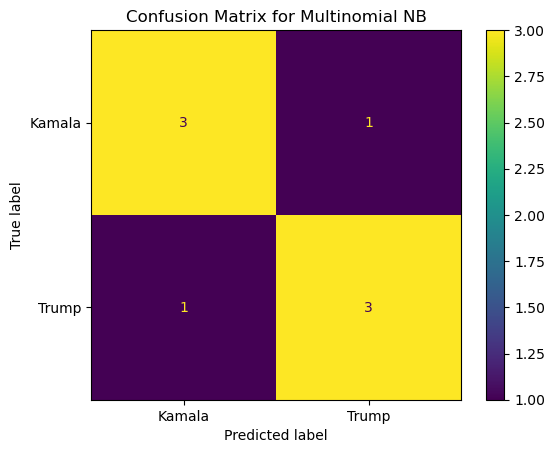

In [18]:
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Kamala", "Trump"])
disp.plot()

plt.title("Confusion Matrix for Multinomial NB")
plt.show()
